In [25]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

In [26]:
traj = md.load('adora2a-aligned.xtc', top="adora2a.pdb")

In [27]:
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print('Max pairwise rmsd: %f nm' % np.max(distances))

Max pairwise rmsd: 0.384684 nm


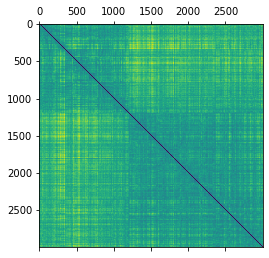

In [28]:
import matplotlib.pyplot as plt

plt.matshow(distances)

In [94]:
import pickle
with open("rmsd_distances.pickle", "wb") as file:
    pickle.dump(distances, file, -1)

In [29]:
# Clustering only accepts reduced form. Squareform's checks are too stringent
#assert np.all(distances - distances.T < 1e-6)
reduced_distances = squareform(distances, checks=False)

In [30]:

linkage = scipy.cluster.hierarchy.linkage(reduced_distances, method='average')

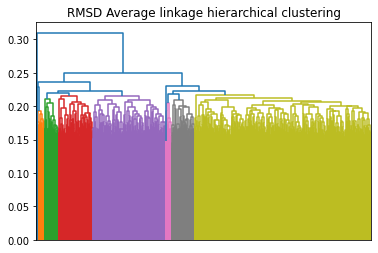

In [33]:
plt.title('RMSD Average linkage hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')

In [34]:
clusters = scipy.cluster.hierarchy.fcluster(linkage, t=0.2, criterion="distance")

In [134]:
# ---------------- cluster like gromos ----------------------#

# get the neighbor counts
def f(row):
    return len(row[np.argwhere(row<0.2)])

frames_leftover = np.array(list(range(traj.n_frames)))
cluster_labels = np.array([None for i in frames_leftover])
hubs = []
distances_fl = distances[frames_leftover,:]
cluster_id = 0
while frames_leftover.shape[0] > 1:
    # find the hub structure (most neighbors)
    hub_local = np.apply_along_axis(f, 1, distances_fl).argmax()
    hub_global = frames_leftover[hub_local]
    # find all it's neighbors
    cluster_elements_local_ind = np.argwhere(distances_fl[hub_local, :]<=0.2).flatten()
    cluster_elements_global_ind = frames_leftover[cluster_elements_local_ind]
    cluster_labels[cluster_elements_global_ind] = cluster_id
    frames_leftover = np.argwhere(cluster_labels==None).flatten()
    distances_fl = distances[frames_leftover,:][:, frames_leftover]
    hubs.append(hub_global)
    print("Identified cluster {}".format(cluster_id))
    print("With #{} elements".format(len(cluster_elements_global_ind)))
    print("With hub: {}".format(hub_global))
    cluster_id+=1

Identified cluster 0
With #1404 elements
With hub: 2518
Identified cluster 1
With #715 elements
With hub: 169
Identified cluster 2
With #237 elements
With hub: 2243
Identified cluster 3
With #114 elements
With hub: 1085
Identified cluster 4
With #99 elements
With hub: 524
Identified cluster 5
With #83 elements
With hub: 253
Identified cluster 6
With #45 elements
With hub: 1318
Identified cluster 7
With #44 elements
With hub: 2917
Identified cluster 8
With #37 elements
With hub: 2126
Identified cluster 9
With #33 elements
With hub: 467
Identified cluster 10
With #30 elements
With hub: 1164
Identified cluster 11
With #23 elements
With hub: 715
Identified cluster 12
With #20 elements
With hub: 1821
Identified cluster 13
With #12 elements
With hub: 40
Identified cluster 14
With #12 elements
With hub: 2832
Identified cluster 15
With #11 elements
With hub: 185
Identified cluster 16
With #10 elements
With hub: 885
Identified cluster 17
With #10 elements
With hub: 1890
Identified cluster 18
Wi

In [136]:
hubs

[2518,
 169,
 2243,
 1085,
 524,
 253,
 1318,
 2917,
 2126,
 467,
 1164,
 715,
 1821,
 40,
 2832,
 185,
 885,
 1890,
 1273,
 55,
 597,
 281,
 2220,
 1972,
 663,
 1213,
 446,
 1099,
 2979,
 207,
 265,
 366,
 484,
 641,
 979,
 1208,
 1476,
 1528,
 1541,
 1596,
 2161,
 2373,
 2620]

In [113]:
np.argwhere(cluster_labels==None).shape

(2641, 1)

In [109]:
cluster_labels

array([0, 0, 0, ..., None, None, None], dtype=object)

In [120]:
np.distances[[2,3,4],:]

array([[0.15525174, 0.14657007, 0.        , ..., 0.27034295, 0.26951757,
        0.26604274],
       [0.15417621, 0.15255779, 0.14867385, ..., 0.28457758, 0.28368163,
        0.2805905 ],
       [0.15295556, 0.16447085, 0.16820969, ..., 0.26944831, 0.2762773 ,
        0.26318818]])

In [102]:
tmp =  np.array([None for i in range(3000)])

In [104]:
tmp[[1,5,2]] = [1,2,3]

In [105]:
tmp

array([None, 1, 3, ..., None, None, None], dtype=object)

In [100]:
np.argwhere(distances[1, :]<0.2).flatten()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   47,
         50,   52,   53,   54,   65,   66,   67,   68,   69,   70,   71,
         72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
         94,   95,   96,   97,   98,   99,  100,  101,  102,  103,  104,
        105,  106,  107,  108,  109,  111,  112,  113,  114,  115,  116,
        117,  119,  120,  121,  122,  123,  124,  125,  126,  128,  130,
        131,  133,  134,  135,  136,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  151,  152,  153,  154,
        155,  156,  158,  159,  160,  161,  162,  164,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  176,  1

In [96]:

np.apply_along_axis(f, 1, distances)

array([326, 359, 260, ..., 198, 191, 150])

In [48]:
np.argwhere(clusters==2).flatten()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900])

In [92]:
distances

array([[0.        , 0.14582032, 0.15525174, ..., 0.26766044, 0.27236411,
        0.26858324],
       [0.14582305, 0.        , 0.14657007, ..., 0.26626059, 0.26419273,
        0.25820372],
       [0.15525174, 0.14657007, 0.        , ..., 0.27034295, 0.26951757,
        0.26604274],
       ...,
       [0.26766193, 0.26626059, 0.27034295, ..., 0.        , 0.13983095,
        0.14270961],
       [0.27236411, 0.26419273, 0.26951757, ..., 0.13983095, 0.        ,
        0.13562392],
       [0.26858324, 0.25820372, 0.26604274, ..., 0.14270961, 0.13562392,
        0.        ]])

In [53]:
distances[[1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900],:][:,[1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900]]

array([[0.        , 0.13379017, 0.15715855, 0.15785697, 0.15979484,
        0.17154802, 0.15885511, 0.15910491, 0.16399448, 0.16037782,
        0.16166526, 0.16679423, 0.16702265, 0.16524655, 0.17522424,
        0.1859666 , 0.18013926, 0.18326041, 0.18318237, 0.17868051,
        0.179501  ],
       [0.13379017, 0.        , 0.13235767, 0.13481624, 0.13902773,
        0.16014239, 0.15240152, 0.15595107, 0.1683442 , 0.15990911,
        0.16169228, 0.16689183, 0.17323205, 0.17524917, 0.18596233,
        0.1841899 , 0.17481354, 0.19285634, 0.19643302, 0.18446997,
        0.17896478],
       [0.15715855, 0.13235767, 0.        , 0.13418438, 0.14443018,
        0.16219011, 0.15669543, 0.16574807, 0.18246771, 0.16677757,
        0.16354586, 0.18273741, 0.18409283, 0.18066539, 0.19785123,
        0.20066348, 0.1828482 , 0.20855349, 0.2167117 , 0.1987704 ,
        0.18801187],
       [0.15785697, 0.13481624, 0.13418438, 0.        , 0.1495315 ,
        0.16343169, 0.17083119, 0.16151042, 0.1840237

In [50]:
distances[1880:1890, 1880:1890]

array([[0.        , 0.13379017, 0.15715855, 0.15785697, 0.15979484,
        0.17154802, 0.15885511, 0.15910491, 0.16399448, 0.16037782],
       [0.13379017, 0.        , 0.13235767, 0.13481624, 0.13902773,
        0.16014239, 0.15240152, 0.15595107, 0.1683442 , 0.15990911],
       [0.15715855, 0.13235767, 0.        , 0.13418438, 0.14443018,
        0.16219011, 0.15669543, 0.16574807, 0.18246771, 0.16677757],
       [0.15785697, 0.13481624, 0.13418438, 0.        , 0.1495315 ,
        0.16343169, 0.17083119, 0.16151042, 0.18402378, 0.17605408],
       [0.15979484, 0.13902773, 0.14443018, 0.1495315 , 0.        ,
        0.14160052, 0.14694352, 0.14871925, 0.17540321, 0.16127419],
       [0.17154802, 0.16014239, 0.16218767, 0.16343169, 0.14160052,
        0.        , 0.13458629, 0.14806892, 0.16381276, 0.15951623],
       [0.15885511, 0.15240152, 0.15669543, 0.17083119, 0.14694352,
        0.13458629, 0.        , 0.13212343, 0.14977033, 0.14964566],
       [0.15910491, 0.15595107, 0.1657480

In [89]:
# Identify representatives
ens_representatives = []
for clust_id in set(clusters):
    print("Cluster {}".format(clust_id))
    clust_elem_inds = np.argwhere(clusters==clust_id).flatten()
    clust_elems = distances[clust_elem_inds,:][:,clust_elem_inds]
    print("Frame elements dimestion: {}".format(clust_elems.shape))
    #find the representative - the one that has the most neighbors below thr
    repr_index = np.apply_along_axis(f, 1, clust_elems).argmax()
    print("Index of the representative within cluster: {}".format(repr_index))
    repr_index_traj = clust_elem_inds[repr_index]
    print("Index of the representative within trajectory: {}".format(repr_index_traj))
    ens_representatives.append(repr_index_traj)

Cluster 1
Frame elements dimestion: (2, 2)
Index of the representative within cluster: 0
Index of the representative within trajectory: 1476
Cluster 2
Frame elements dimestion: (21, 21)
Index of the representative within cluster: 0
Index of the representative within trajectory: 1880
Cluster 3
Frame elements dimestion: (189, 189)
Index of the representative within cluster: 96
Index of the representative within trajectory: 2518
Cluster 4
Frame elements dimestion: (221, 221)
Index of the representative within cluster: 135
Index of the representative within trajectory: 2750
Cluster 5
Frame elements dimestion: (168, 168)
Index of the representative within cluster: 104
Index of the representative within trajectory: 1841
Cluster 6
Frame elements dimestion: (53, 53)
Index of the representative within cluster: 12
Index of the representative within trajectory: 1436
Cluster 7
Frame elements dimestion: (181, 181)
Index of the representative within cluster: 126
Index of the representative within tr

In [91]:
ens_representatives

[1476,
 1880,
 2518,
 2750,
 1841,
 1436,
 2428,
 2197,
 2060,
 2135,
 1907,
 1740,
 1334,
 1254,
 1214,
 1159,
 1200,
 2842,
 2860,
 2977,
 2371,
 897,
 824,
 974,
 1055,
 38,
 156,
 54,
 225,
 663,
 674,
 772,
 517,
 639,
 452,
 481,
 561,
 446,
 389,
 299,
 366,
 2758]

2518

In [ ]:
distances[]

In [71]:
distances.shape

(3000, 3000)

In [65]:
for row in distances:
    print(len(row[np.argwhere(row<0.2)]))

326
359
260
373
332
239
160
148
218
103
175
176
277
146
255
223
245
214
261
376
363
456
296
238
337
180
133
59
319
191
243
167
168
212
171
138
355
194
179
96
68
89
75
95
59
30
85
157
48
129
163
111
256
335
388
70
55
150
133
85
126
139
85
144
88
189
269
94
130
220
241
288
361
280
456
342
239
344
446
206
366
444
470
454
215
413
231
376
208
378
525
310
309
432
460
462
554
584
422
333
335
280
460
290
598
308
265
340
248
227
62
194
319
498
208
445
471
418
178
382
253
355
284
287
369
199
277
300
397
131
384
396
172
270
247
259
270
178
143
409
442
220
195
185
167
331
216
182
200
159
365
529
441
612
368
277
507
433
348
348
236
536
482
191
474
330
297
528
529
732
474
573
597
478
324
177
402
292
258
271
253
170
490
277
230
113
69
385
350
255
307
183
278
304
145
150
169
175
297
199
113
96
76
59
61
80
152
97
157
136
179
173
135
318
240
205
188
267
280
147
98
229
447
414
477
386
218
418
176
209
174
225
209
215
372
111
102
222
191
240
109
120
179
141
126
233
269
169
130
336
469
121
151
250
260
206
2

607
872
732
841
815
327
219
314
164
376
703
243
282
245
472
327
114
139
186
561
358
395
418
498
446
683
630
321
266
392
698
862
892
649
927
912
1053
1097
507
482
628
357
274
476
491
348
955
887
724
422
693
858
771
621
613
704
607
869
956
934
705
581
868
569
490
347
451
453
303
341
283
154
214
77
152
707
368
386
381
347
232
567
207
655
667
453
399
297
661
600
279
317
862
767
785
736
410
706
313
644
543
712
1060
1132
1000
1183
1080
825
941
957
892
524
581
676
711
859
597
725
547
511
671
576
742
857
1114
683
713
443
633
287
397
330
823
374
360
278
463
616
521
528
301
495
570
637
757
738
398
456
822
1142
1190
656
1000
645
1258
1227
1077
574
635
583
635
497
795
781
666
960
566
688
767
1124
803
835
839
1231
726
1224
823
758
1033
590
638
1034
746
1031
1037
765
586
1150
1026
665
892
853
250
598
465
476
478
341
614
769
874
879
743
1027
769
671
839
951
1075
1097
1281
993
845
341
690
582
336
963
613
551
885
561
958
1247
639
879
1026
924
1156
1016
1088
822
953
804
567
203
329
266
376
175
74
329
32